# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys, os, numpy as np
from tqdm import tnrange, tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


from unityagents import UnityEnvironment
import torch

In [2]:
from agent import *
from model import *
from trainer import *
import utils

In [3]:
# Tennis
fname = "../unity_envs/Tennis_Linux_NoVis/Tennis.x86_64"
# fname = "../unity_envs/Tennis_Linux/Tennis.x86_64"
# fname = "../unity_envs/Tennis.app"

In [4]:
env_id = 'Tennis'
seed = 0
logdir='logdir'
exp_id = 2

fp = f'{logdir}/{env_id}_agent_exp{exp_id}/'
env_config = {
    'file_name': '../p2_hal/'+fname,
    'no_graphics': True,
    'seed': seed
}
utils.rm_dir(fp)
utils.save_config(env_config, filepath=fp+'/env_config')

Directory created: logdir/Tennis_agent_exp2/


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
env, brain_name, num_agents, action_size, state_size = build_env(**env_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [6]:
learner_config = {
    'action_size':action_size,
    'memory_size': int(1e6),
    'batch_size': 256,
    'shared_memory': True,
    'filepath': f'{logdir}/{exp_id}/checkpoint',
    'random_seed': 0
}
utils.save_config(learner_config, filepath=fp+'/learner_config')

In [7]:
learner = Learner(**learner_config)

In [8]:
agent_config = {
    'state_size':state_size,
    'action_size':action_size,
    'shared_memory': learner.memory,
    'memory_size': int(1e6),
    'batch_size': 128,
    'gamma': 0.99,
    'tau': 1e-3,
    'learning_rate_actor': 3e-4,
    'learning_rate_critic': 1e-4,
    'weight_decay': 0.0, #0001, # L2 weight decay
    'network_actor': Actor,
    'network_layers_actor': [256,256],
    'network_critic': Critic,
    'network_layers_critic':[256,256],
    'optimizer_actor': torch.optim.Adam,
    'optimizer_critic': torch.optim.Adam,
    'clip_critic': True,
    'use_noise': True,
    'filepath': f'{logdir}/{exp_id}/checkpoint',
    'random_seed': 0
}
utils.save_config(agent_config, filepath=fp+'/agent_config')

In [9]:
learner.add(Agent(**agent_config))
learner.add(Agent(**agent_config))

In [10]:
training_config = {
    'learner': learner,
    'env': env,
    'brain_name': brain_name,
    'n_episodes': int(1e4), 
    'max_t':None, 
    'print_every':1, 
    'checkpoint_freq':200, 
    'checkpoint_dir': fp,
    'reward_window':100, 
    'target_reward': .5,
    'add_noise':True, 
    'close':True,
}
utils.save_config(training_config, filepath=fp+'/training_config')



In [11]:
scores = trainer(**training_config)

Scores: a1: 0.0000 | a2: -0.0100 | (Avg: 0.00000):   0%|          | 2/10000 [00:00<12:51, 12.96it/s]


Scores from last episode and the average over 100 will update every 1 episodes.



Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.00000):   2%|▏         | 200/10000 [00:56<51:00,  3.20it/s]


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.01350):   4%|▍         | 400/10000 [02:05<59:39,  2.68it/s]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.01860):   6%|▌         | 600/10000 [03:21<56:34,  2.77it/s]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.01750):   8%|▊         | 800/10000 [04:39<57:22,  2.67it/s]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.00980):  10%|█         | 1000/10000 [05:56<1:05:29,  2.29it/s]


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.02290):  12%|█▏        | 1200/10000 [07:20<48:45,  3.01it/s]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.0000 | (Avg: 0.03990):  14%|█▍        | 1400/10000 [08:52<51:02,  2.81it/s]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: -0.0100 | a2: 0.1000 | (Avg: 0.08490):  16%|█▌        | 1600/10000 [10:55<1:23:43,  1.67it/s]


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 0.1000 | a2: -0.0100 | (Avg: 0.11680):  18%|█▊        | 1800/10000 [14:00<1:38:33,  1.39it/s]


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 0.4900 | a2: 0.6000 | (Avg: 0.18700):  20%|██        | 2000/10000 [18:49<6:38:44,  2.99s/it] 


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 0.1000 | a2: 0.0900 | (Avg: 0.32200):  22%|██▏       | 2200/10000 [28:40<8:09:37,  3.77s/it]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 0.1900 | a2: 0.2000 | (Avg: 0.44510):  24%|██▍       | 2400/10000 [42:01<7:23:25,  3.50s/it]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 0.4000 | a2: 0.3900 | (Avg: 0.42320):  26%|██▌       | 2600/10000 [56:34<8:59:54,  4.38s/it]  


Learner saved to logdir/Tennis_agent_exp2/learner.


Scores: a1: 2.0000 | a2: 1.9900 | (Avg: 0.50000):  28%|██▊       | 2755/10000 [1:08:55<6:03:52,  3.01s/it]  
Environment solved in 2656 episodes!	Average Score: 0.50:  28%|██▊       | 2755/10000 [1:08:55<6:03:52,  3.01s/it]


Learner saved to /learner.
Finished training.


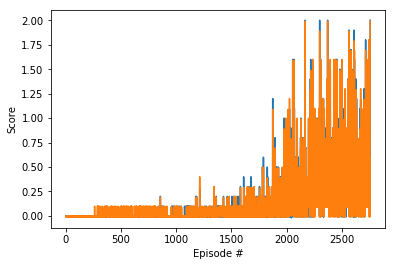

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
utils.save_pickle(scores, fp+'scores')

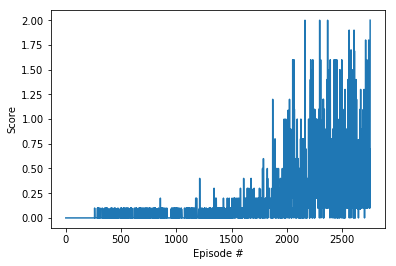

In [14]:
np.array(scores).shape
utils.plot_scores(np.max(scores, axis=1))